<a href="https://colab.research.google.com/github/Sohith-Pothula/My-Data-Science-Journey/blob/main/KNN_Algorithm_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from collections import Counter

In [2]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

In [3]:
def knn_predict(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]

In [4]:
training_data = [[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]]
training_labels = ['A', 'A', 'A', 'B', 'B']
test_point = [4, 5]
k = 3

In [5]:
prediction = knn_predict(training_data, training_labels, test_point, k)
print(prediction)

A


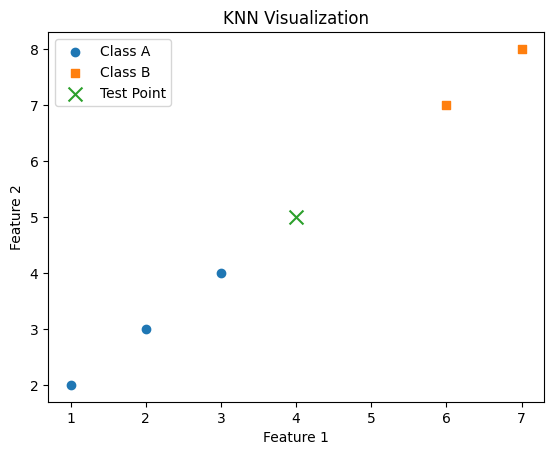

In [6]:
import matplotlib.pyplot as plt

# Training data
training_data = [[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]]
training_labels = ['A', 'A', 'A', 'B', 'B']

# Test point
test_point = [4, 5]

# Separate points by class
x_A = [point[0] for point, label in zip(training_data, training_labels) if label == 'A']
y_A = [point[1] for point, label in zip(training_data, training_labels) if label == 'A']

x_B = [point[0] for point, label in zip(training_data, training_labels) if label == 'B']
y_B = [point[1] for point, label in zip(training_data, training_labels) if label == 'B']

# Plot training points
plt.scatter(x_A, y_A, marker='o', label='Class A')
plt.scatter(x_B, y_B, marker='s', label='Class B')

# Plot test point
plt.scatter(test_point[0], test_point[1], marker='x', s=100, label='Test Point')

# Labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Visualization')
plt.legend()

# Show plot
plt.show()


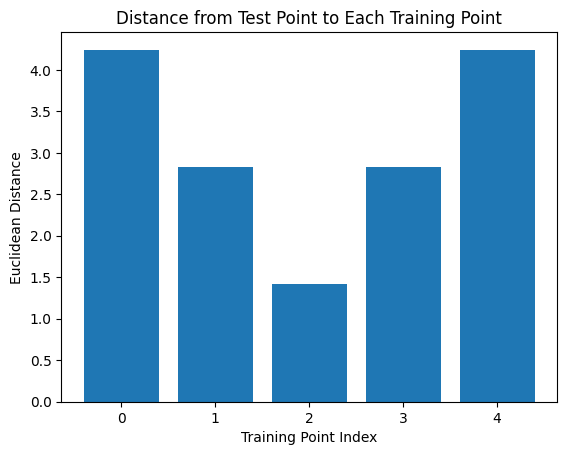

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Training data and labels
training_data = np.array([[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]])
training_labels = ['A', 'A', 'A', 'B', 'B']
test_point = np.array([4, 5])

# Compute distances
distances = [np.linalg.norm(test_point - point) for point in training_data]

# Plot bar graph
plt.bar(range(len(distances)), distances)
plt.xlabel("Training Point Index")
plt.ylabel("Euclidean Distance")
plt.title("Distance from Test Point to Each Training Point")
plt.show()


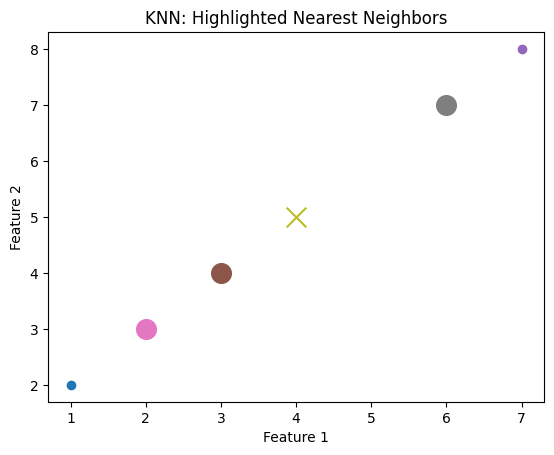

In [8]:
# Sort distances with points
dist_label_point = list(zip(distances, training_data, training_labels))
dist_label_point.sort(key=lambda x: x[0])

# Pick k nearest
k = 3
neighbors = dist_label_point[:k]

# Plot all points
for point, label in zip(training_data, training_labels):
    plt.scatter(point[0], point[1])

# Highlight neighbors
for _, point, _ in neighbors:
    plt.scatter(point[0], point[1], marker='o', s=200)

# Test point
plt.scatter(test_point[0], test_point[1], marker='x', s=200)

plt.title("KNN: Highlighted Nearest Neighbors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


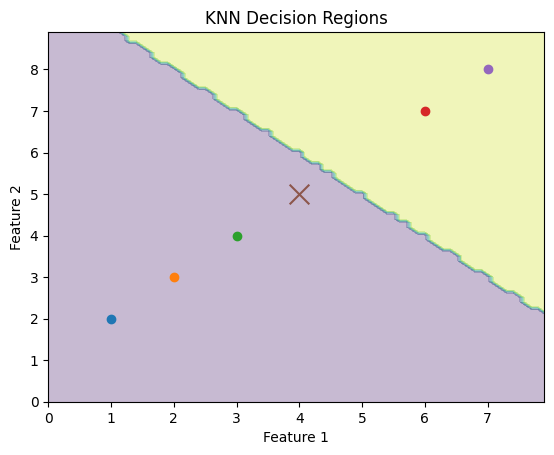

In [9]:
# Create grid
x_min, x_max = 0, 8
y_min, y_max = 0, 9
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict for each grid point
grid_predictions = [
    knn_predict(training_data.tolist(), training_labels, point.tolist(), 3)
    for point in grid_points
]

# Convert labels to numbers
color_map = {'A': 0, 'B': 1}
Z = np.array([color_map[p] for p in grid_predictions])
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.contourf(xx, yy, Z, alpha=0.3)

# Plot training points
for point, label in zip(training_data, training_labels):
    plt.scatter(point[0], point[1])

# Test point
plt.scatter(test_point[0], test_point[1], marker='x', s=200)

plt.title("KNN Decision Regions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


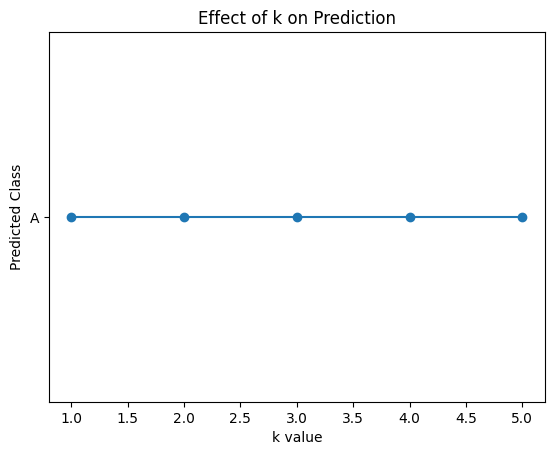

In [10]:
k_values = range(1, 6)
predictions = []

for k in k_values:
    predictions.append(knn_predict(training_data.tolist(), training_labels, test_point.tolist(), k))

plt.plot(k_values, predictions, marker='o')
plt.xlabel("k value")
plt.ylabel("Predicted Class")
plt.title("Effect of k on Prediction")
plt.show()
